In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from networkx.readwrite import json_graph
from scipy import stats

In [2]:
filename = 'data/twitter_graph.json'

with open(filename) as f:
    twitter = json.load(f) # DBpedia is a dictionary

In [3]:
keys = twitter.keys()

In [4]:
twitter[list(keys)[0]]

['Q35986', 'Q1139554']

In [7]:
# number of companies:

num_tweets = len(twitter)
num_tweets

558898

In [14]:
def add_element_list_tweet (list_tweet, topic):

    if tweet not in list_tweet.keys():
        list_tweet[tweet] = 1
    else:
        list_tweet[tweet] = list_tweet[tweet] + 1

    return list_tweet

In [15]:
# topics

list_tweet = dict()

for key,item in twitter.items():
    
    if len(item)>0: # non empty company info
        
        for tweet in item:
            add_element_list_tweet (list_tweet, tweet)

In [16]:
# number of topics:

num_tweets_topic = len(list_tweet)
num_tweets_topic

558898

In [17]:
# sort dict:

list_tweets_sorted = {k: v for k, v in sorted(list_tweet.items(), key=lambda item: item[1], reverse=True)}

In [18]:
n = 20 # first n topics (more common)

list_tweets_first = {i: list_tweet[i] for i in list(list_tweets_sorted)[:n]}
list_tweets_first

{'Q918': 26922,
 'srfnews': 12743,
 'Medien_News': 12307,
 'NZZ': 12075,
 'RTSinfo': 11524,
 'myjournals': 9991,
 'Ticinonline': 9945,
 'srfsport': 8751,
 'kathch': 8671,
 '1815_online': 8064,
 'Lematinch': 7744,
 'tagesanzeiger': 7704,
 'Moneycab': 7645,
 'nau_live': 7382,
 'Sportnewsbuzz': 7134,
 '24heuresch': 7092,
 '20minutesOnline': 6955,
 'efipm': 6510,
 'tdgch': 5940,
 'BernerZeitung': 5822}

In [21]:
"srfnews" in twitter["Q814267"]

True

In [23]:
"kerpen" in twitter["Q918"]

True

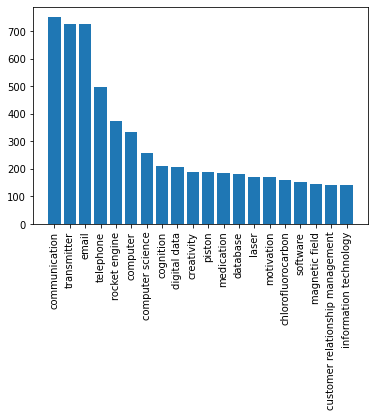

In [16]:
plt.bar(range(n), list_topics_first.values(), align="center")
plt.xticks(range(n), list(list_topics_first.keys()), rotation=90);

In [17]:
# list companies first topics

dict_company_first = dict() # dictionary companies which contains first topics

for company,item in DBpedia.items():
    
    if len(item)>0: # non empty company info

            topics_company = list(item.keys())
            
            if any(x in list_topics_first for x in topics_company):
                dict_company_first[company] = topics_company

In [18]:
print(f"{len(dict_company_first)} companies contain at least one topic of the {n} most common ones.")

4385 companies contain at least one topic of the 20 most common ones.


In [19]:
# create graph of topics:
G = nx.Graph()

G.add_nodes_from(list_topics_first.keys())

# give weight edge: number of companies which share the same topics
for a in list_topics_first.keys():
    for b in list_topics_first.keys():
        if a!=b: # not same node
            edge_weight = 0
            
            for company,topics in dict_company_first.items():
                if a in topics and b in topics:
                    edge_weight += 1
            if edge_weight>5:
                G.add_edge(a, b, weight=edge_weight)

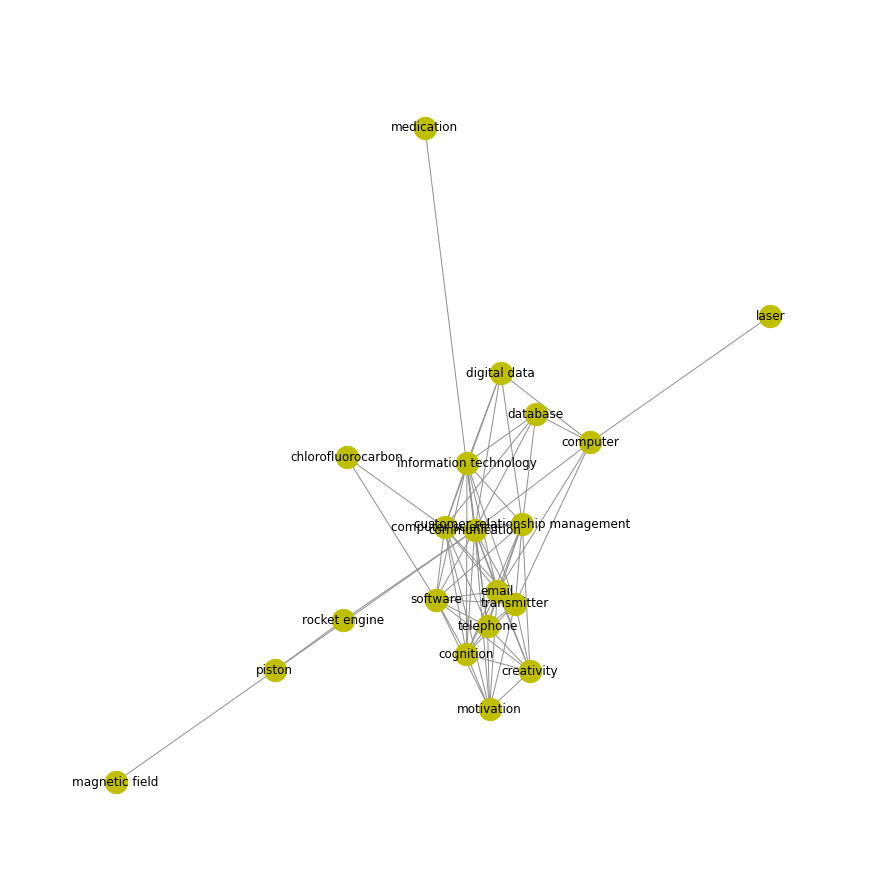

In [20]:
labels=G.nodes

pos = nx.spring_layout(G)

plt.figure(figsize=(12,12))
nx.draw(G, node_color='y', edge_color='#909090', node_size=500, with_labels=True, pos=pos)
plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.show()

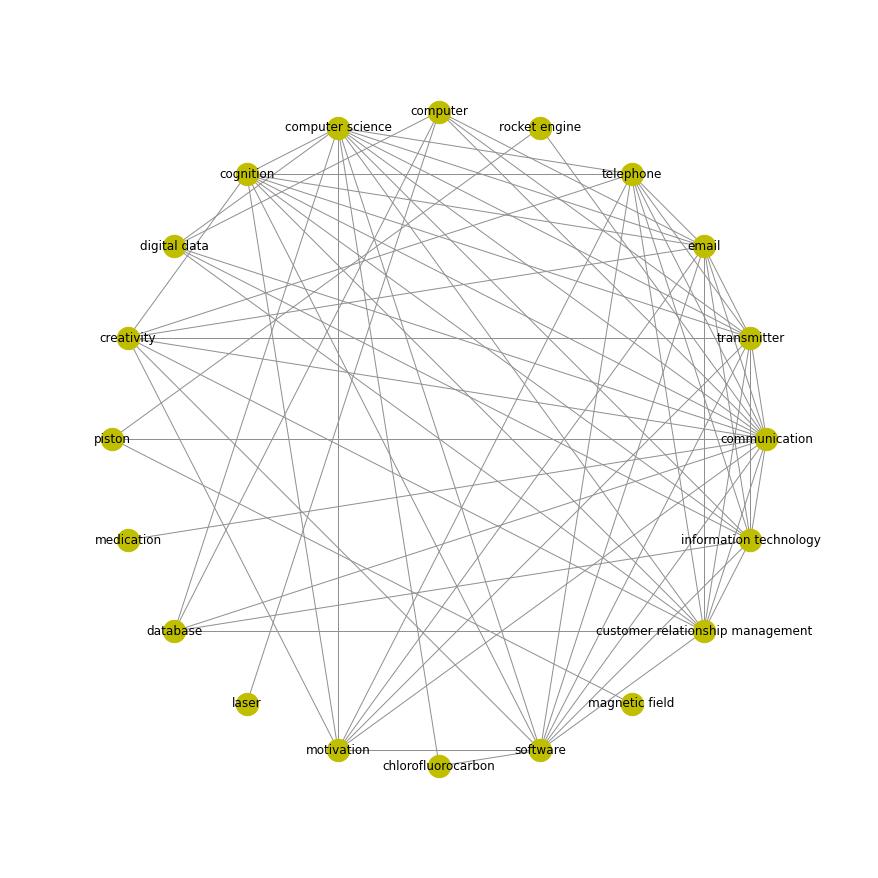

In [21]:
pos = nx.circular_layout(G)

plt.figure(3,figsize=(12,12))
nx.draw(G, node_color='y', edge_color='#909090', node_size=500, with_labels=True, pos=pos)
plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.show()